<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/ML_KNN%26Ensemble_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_learning_curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러오기 붓꽃 데이터
---
- 꽃받침(Sepal)과 꽃잎(Petal)의 길이와 폭을 가지고 세개의 종을 분류

In [17]:
iris = load_iris()

In [18]:
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
iris_df['target'].unique()

array([0, 1, 2])

## 꽃잎의 길이와 폭을 가지고 분류 KNN

총 테스트 개수: 45, 오류개수: 0
정확도: 1.0


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'KNN on iris')

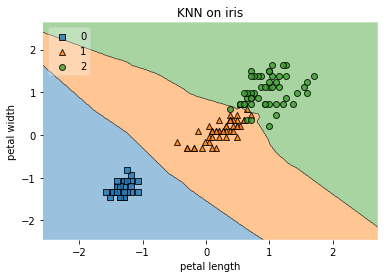

In [20]:
model = KNeighborsClassifier(n_neighbors=5, p = 2, metric='minkowski')
X = iris.data[:,[2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ml = model

ml.fit(X_train_std,y_train)
y_pred = ml.predict(X_test_std)

print('총 테스트 개수: {}, 오류개수: {}'.format(len(y_test),(y_test != y_pred).sum()))
print('정확도: {}'.format(accuracy_score(y_test,y_pred)))

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined_std = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std, y=y_combined_std, clf = ml, legend=2)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('KNN on iris')

총 테스트 개수: 45, 오류개수: 2
정확도: 0.9555555555555556


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Bagging KNN on iris')

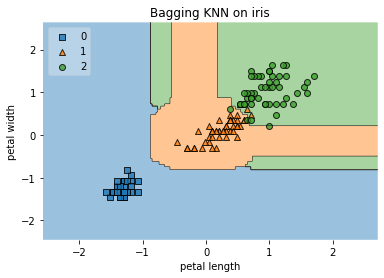

In [21]:
model = KNeighborsClassifier(n_neighbors=5, p = 2, metric='minkowski')
bagging_model = BaggingClassifier(model, n_estimators=10, max_samples= 0.5, max_features= 0.5)
X = iris.data[:,[2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ml = bagging_model

ml.fit(X_train_std,y_train)
y_pred = ml.predict(X_test_std)

print('총 테스트 개수: {}, 오류개수: {}'.format(len(y_test),(y_test != y_pred).sum()))
print('정확도: {}'.format(accuracy_score(y_test,y_pred)))

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined_std = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std, y=y_combined_std, clf = ml, legend=2)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Bagging KNN on iris')

([0.1,
  0.09523809523809523,
  0.06451612903225806,
  0.047619047619047616,
  0.038461538461538464,
  0.031746031746031744,
  0.0273972602739726,
  0.023809523809523808,
  0.0425531914893617,
  0.047619047619047616],
 [0.4444444444444444,
  0.37777777777777777,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223])

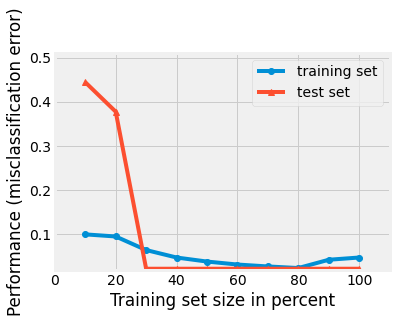

In [22]:
plt.figure()
plot_learning_curves(X_train,y_train,X_test,y_test, model, print_model=False, )

([0.6,
  0.09523809523809523,
  0.0967741935483871,
  0.047619047619047616,
  0.038461538461538464,
  0.047619047619047616,
  0.0273972602739726,
  0.023809523809523808,
  0.031914893617021274,
  0.02857142857142857],
 [0.6,
  0.4,
  0.022222222222222223,
  0.044444444444444446,
  0.022222222222222223,
  0.022222222222222223,
  0.044444444444444446,
  0.044444444444444446,
  0.044444444444444446,
  0.022222222222222223])

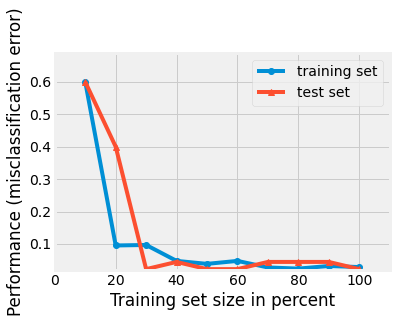

In [23]:
plt.figure()
plot_learning_curves(X_train,y_train,X_test,y_test, bagging_model, print_model=False, )

## 꽃받침

총 테스트 개수: 45, 오류개수: 11
정확도: 0.7555555555555555


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'KNN on iris')

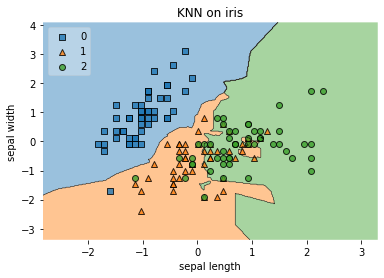

In [24]:
model = KNeighborsClassifier(n_neighbors=5, p = 2, metric='minkowski')
X = iris.data[:,[0,1]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ml = model

ml.fit(X_train_std,y_train)
y_pred = ml.predict(X_test_std)

print('총 테스트 개수: {}, 오류개수: {}'.format(len(y_test),(y_test != y_pred).sum()))
print('정확도: {}'.format(accuracy_score(y_test,y_pred)))

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined_std = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std, y=y_combined_std, clf = ml, legend=2)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('KNN on iris')

총 테스트 개수: 45, 오류개수: 12
정확도: 0.7333333333333333


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Bagging on iris')

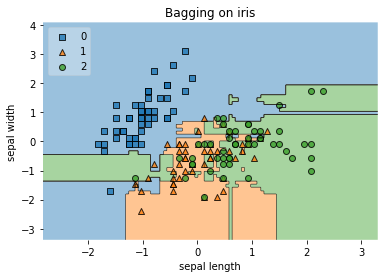

In [25]:
model = KNeighborsClassifier(n_neighbors=5, p = 2, metric='minkowski')
bagging_model = BaggingClassifier(model, n_estimators= 10, max_samples=0.5, max_features= 0.5)
X = iris.data[:,[0,1]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ml = bagging_model

ml.fit(X_train_std,y_train)
y_pred = ml.predict(X_test_std)

print('총 테스트 개수: {}, 오류개수: {}'.format(len(y_test),(y_test != y_pred).sum()))
print('정확도: {}'.format(accuracy_score(y_test,y_pred)))

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined_std = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std, y=y_combined_std, clf = ml, legend=2)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Bagging on iris')

([0.1,
  0.23809523809523808,
  0.16129032258064516,
  0.21428571428571427,
  0.19230769230769232,
  0.14285714285714285,
  0.1780821917808219,
  0.17857142857142858,
  0.20212765957446807,
  0.18095238095238095],
 [0.6666666666666666,
  0.6444444444444445,
  0.3333333333333333,
  0.26666666666666666,
  0.26666666666666666,
  0.3111111111111111,
  0.3111111111111111,
  0.28888888888888886,
  0.28888888888888886,
  0.26666666666666666])

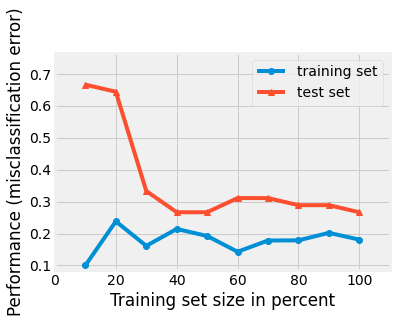

In [26]:
plt.figure()
plot_learning_curves(X_train,y_train,X_test,y_test, model, print_model=False, )

([0.4,
  0.47619047619047616,
  0.41935483870967744,
  0.2619047619047619,
  0.3269230769230769,
  0.1746031746031746,
  0.2054794520547945,
  0.17857142857142858,
  0.14893617021276595,
  0.2],
 [0.7555555555555555,
  0.7555555555555555,
  0.5555555555555556,
  0.4888888888888889,
  0.4222222222222222,
  0.37777777777777777,
  0.37777777777777777,
  0.26666666666666666,
  0.26666666666666666,
  0.26666666666666666])

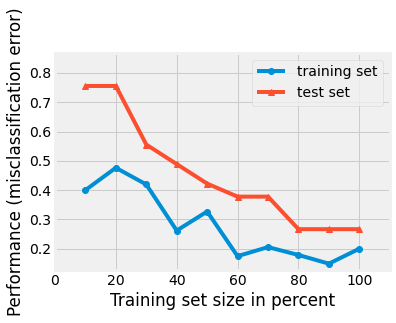

In [27]:
plt.figure()
plot_learning_curves(X_train,y_train,X_test,y_test, bagging_model, print_model=False, )

# Scaling Visualization

In [28]:
pip install mglearn

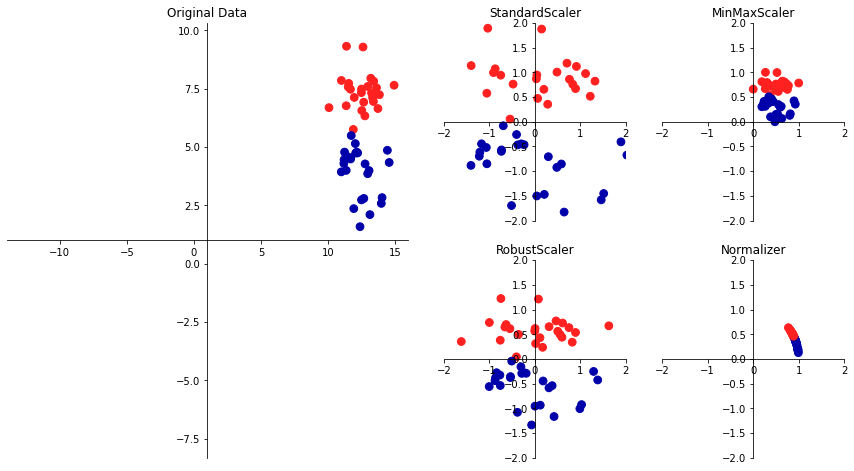

In [29]:
import mglearn

mglearn.plots.plot_scaling()
plt.show()